In [1]:
include("UndrivenHelium.jl")
using Plots, LaTeXStrings
# plotly()
pyplot(grid = :false, legend = :false, size=(600,600), color=:black, markersize = 0.3 )
const Z = 2.0
const order = 20
const t0 = 0.0
const t_max = 0.5 
const abs_tol = 1.0E-20
const steps = 500_000;

In [2]:
include("Integ.jl")

taylorintegps (generic function with 1 method)

In [4]:
#Initial conditions
c1 = condini2D(5.8007, 0.0, 0.0, 0.0, 0.0)

8-element Array{Float64,1}:
 2.40846
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 4.0    
 0.0    

In [6]:
@time tvS, xvS, δSv, mv = vartaylorinteg(undrivenHelium2D!, c1, 0.0, 30.0, 25, 1e-20, maxsteps=3_000);  

 18.969293 seconds (338.19 M allocations: 23.524 GiB, 34.06% gc time)


In [16]:
δSv[600]

7.439021852580165e-12

In [7]:
norm(δSv,Inf)

NaN

In [26]:
xvS

31×8 SubArray{Float64,2,Array{Float64,2},Tuple{UnitRange{Int64},Base.Slice{Base.OneTo{Int64}}},false}:
 1.6053   0.0   0.0       0.0   0.0         0.0   4.0       0.0
 1.6053   0.0   0.277516  0.0  -0.00334061  0.0   3.95166   0.0
 1.60527  0.0   0.497949  0.0  -0.0177552   0.0   3.8346    0.0
 1.60507  0.0   0.680534  0.0  -0.0389789   0.0   3.66301   0.0
 1.60464  0.0   0.82576   0.0  -0.0539923   0.0   3.44958   0.0
 1.60403  0.0   0.949219  0.0  -0.0481204   0.0   3.17534   0.0
 1.60366  0.0   1.0402    0.0  -0.00965243  0.0   2.87488   0.0
 1.60396  0.0   1.11069   0.0   0.0679335   0.0   2.53591   0.0
 1.60541  0.0   1.16504   0.0   0.188354    0.0   2.15605   0.0
 1.60844  0.0   1.20591   0.0   0.350296    0.0   1.73834   0.0
 1.61342  0.0   1.23535   0.0   0.547869    0.0   1.28838   0.0
 1.62071  0.0   1.25496   0.0   0.773371    0.0   0.809965  0.0
 1.63121  0.0   1.26562   0.0   1.02657     0.0   0.28787   0.0
 ⋮                                          ⋮                  
 


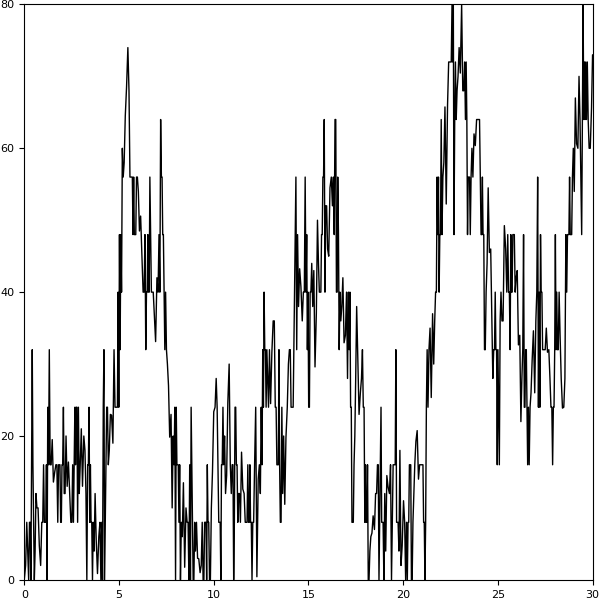

In [20]:
ene1 = Float64[abs(regHam2D(xvS[j, :]))/eps() for j in eachindex(tvS)];
plot(tvS, ene1)

In [17]:
regHam2D(xvS[end,:])

-1.6209256159527285e-14